## Exercise meanshift
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
![../../image.png](attachment:image.png)
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

0


ValueError: x and y must be the same size

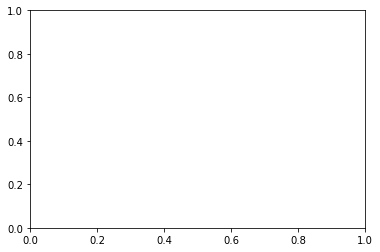

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

def mean_shift(data, n_samples=1000):
    bandwidth = estimate_bandwidth(data, quantile=0.2, 
                                   n_samples=n_samples)
                                   
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    return labels, cluster_centers, n_clusters



fig = plt.figure()
ax = fig.add_subplot(111)

data_points = pd.read_csv('../../data/iris_data.csv', decimal=',')
data_points = data_points.drop(columns=['Petal length','Petal width'])

labels, cluster_centers, n_clusters = mean_shift(data_points[['Sepal length','Sepal width']])

# print(labels, cluster_centers, n_clusters)
unique = data_points['Species'].unique()
color = 'rgbcmy'

# for id, i in enumerate(unique):
#   flower_data = data_points[data_points['Species'] == i]
#   ax.scatter(flower_data['Sepal length'], flower_data['Sepal width'], c=color[id], linewidth=0.2)

for id, i in labels:
  print(id)
  ax.scatter(data_points.iloc[id:0], data_points.iloc[id:1], c=color[i], linewidth=0.2)

# for i in cluster_centers:
#   ax.scatter(i[0], i[1], c='k', s=50, linewidth=0.2)

# plt.show()